In [73]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
%autoreload 2

import logging

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

logging.basicConfig(level=logging.INFO)

INFO:world_rowing.api:loaded most recent competition: 2021 World Rowing Cup III
INFO:world_rowing.api:loaded last race started: Men's Eight Final FA
INFO:world_rowing.dashboard:loading Men's Eight Final FA, starting at 2021-06-06 12:32:00+01:00
DEBUG:world_rowing.dashboard:setting finish axes labels
DEBUG:world_rowing.dashboard:loading live data
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): world-rowing-api.soticcloud.net:443
DEBUG:urllib3.connectionpool:https://world-rowing-api.soticcloud.net:443 "GET /stats/api/livetracker/c956b98e-523a-47a9-bb53-c6b1738255f3 HTTP/1.1" 200 None
DEBUG:world_rowing.dashboard:update_stroke_rate
DEBUG:world_rowing.dashboard:update_pace
DEBUG:world_rowing.dashboard:update_behind
DEBUG:world_rowing.dashboard:update_pos
DEBUG:world_rowing.dashboard:update_intermediates
DEBUG:world_rowing.dashboard:creating finished axes
DEBUG:world_rowing.dashboard:setting finish axes labels
/mnt/c/Users/matthew/Source/rowing/world_rowing/dashboard.py:268:

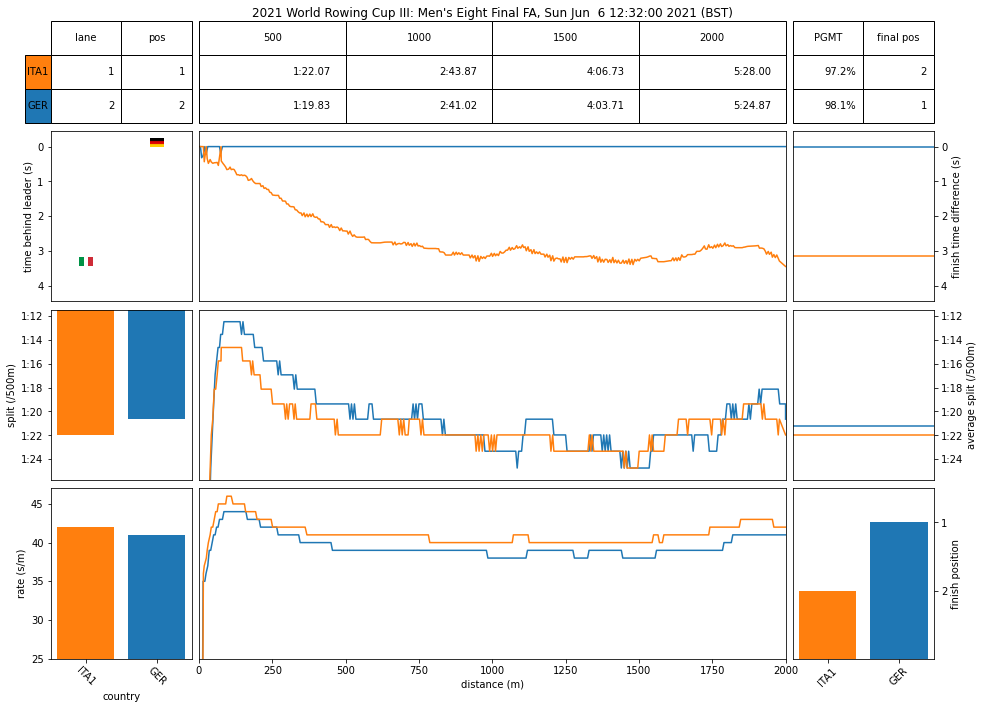

In [75]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))
dash.update()

In [ ]:
races = api.get_competition_races()
race = races.iloc[40]

dash = dashboard.Dashboard.from_race_id(
    race.name, figsize=(14, 10))

live_data, intermediates = dash.race_tracker.update_livedata()

dash.update(
    live_data.loc[:300],
    intermediates[[500, 1000]]
)

INFO:world_rowing.api:loaded most recent competition: 2021 World Rowing Cup III
INFO:world_rowing.dashboard:loading Men's Quadruple Sculls Final A, starting at 2021-06-06 11:47:00+01:00
DEBUG:world_rowing.dashboard:setting finish axes labels
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): world-rowing-api.soticcloud.net:443


In [ ]:
dash.update(
    live_data.loc[:100],
    intermediates[[500, 1000, 1500]]
)
dash.fig

In [ ]:
comp_pgmts = api.get_competition_pgmts()
group_boat_pgmts = comp_pgmts.groupby('BoatClass')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

In [ ]:
print(comp_pgmts.to_string())

In [ ]:
for i, row in comp_pgmts.iterrows():
    print(row)

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.plot(pgmt.values, label=boat)
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();